# Stroke Prediction Model Comparison

This notebook aims to explore, preprocess, and model a dataset to predict the likelihood of a stroke. We will compare multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.
The dataset used in this notebook is from Kaggle and can be found [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

## Introduction

A stroke is a medical condition in which poor blood flow to the brain results in cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both result in parts of the brain not functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. A stroke is a medical emergency, and treatment must be sought as quickly as possible. The longer a stroke goes untreated, the greater the potential for brain damage and disability.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Data Loading

In [2]:
# Load the dataset
stroke_data = pd.read_excel('../Datasets/StrokeData.xlsx')

# Display the first 5 rows of the dataframe
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Exploration

In [3]:
#Checking the shape of the dataset
stroke_data.shape

(5110, 12)

In [4]:
#Basic information about the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Summary statistics of the dataset
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#Checking for unique values in the dataset
stroke_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
#Checking Data Types
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
#Checking for missing values
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Visualization

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#### Initial Data Exploration

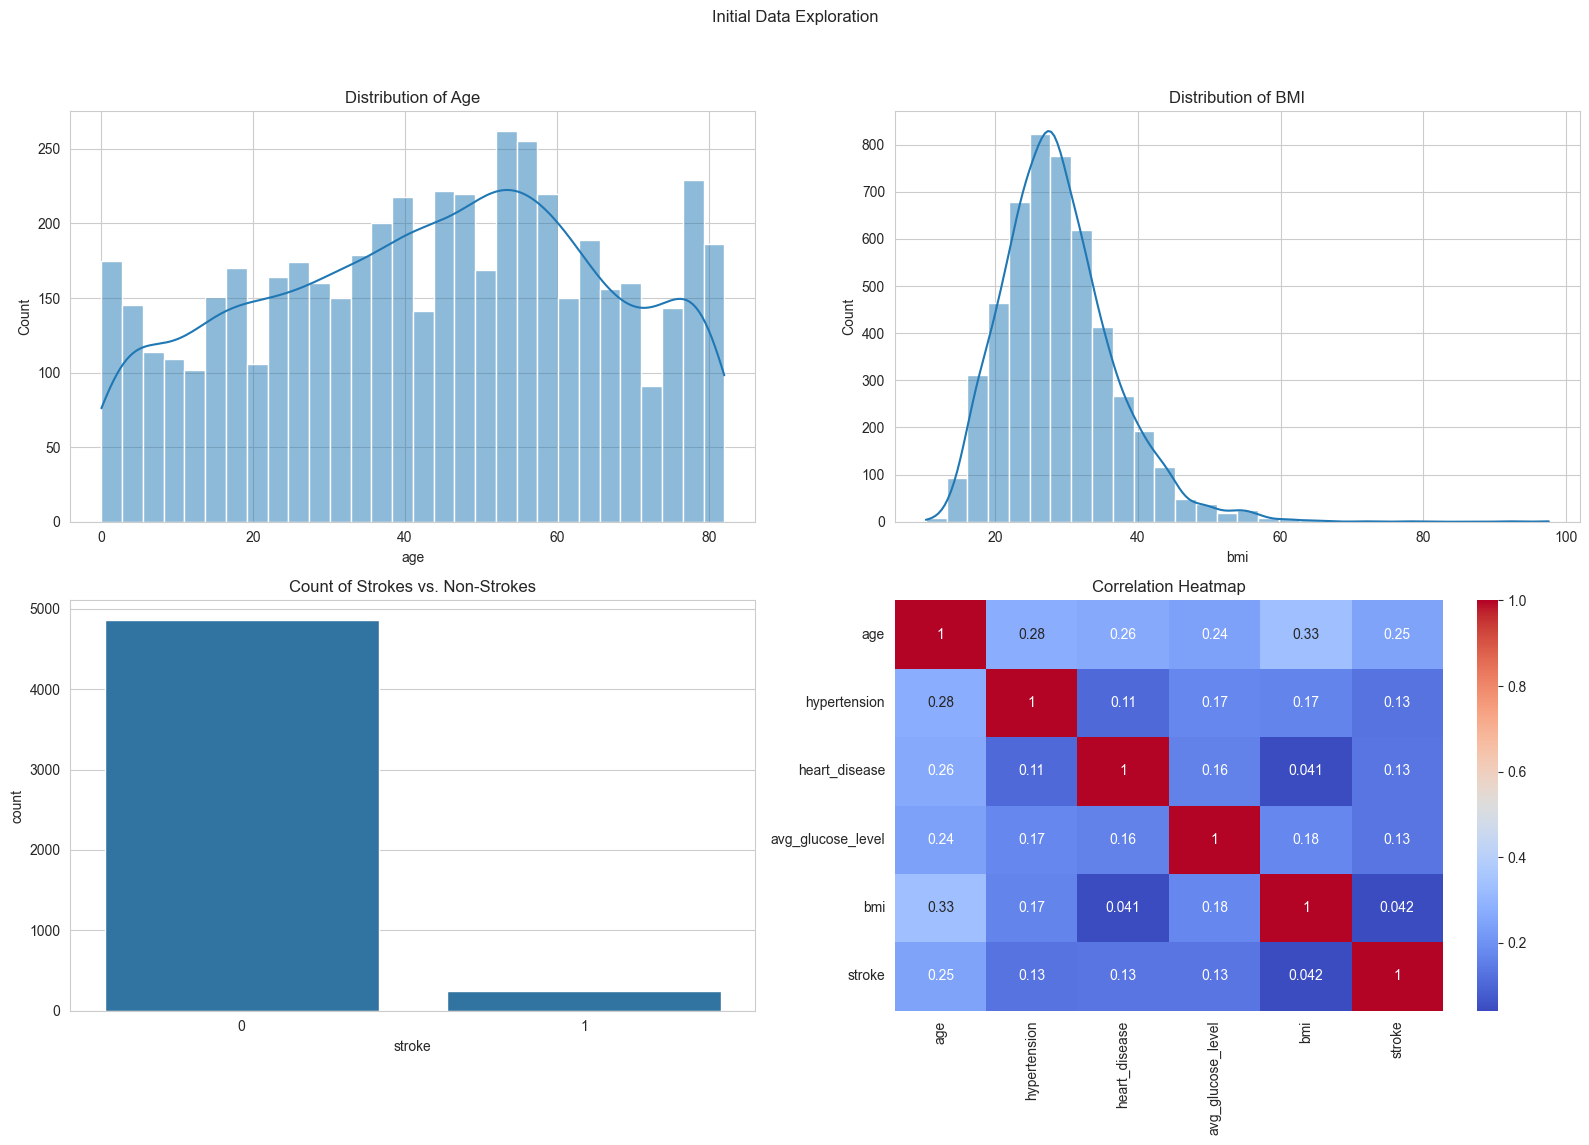

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the figure layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Initial Data Exploration')

# Distribution of Age
sns.histplot(stroke_data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of BMI
sns.histplot(stroke_data[stroke_data['bmi'].notnull()]['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI')

# Count of Strokes vs. Non-Strokes
sns.countplot(x='stroke', data=stroke_data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Strokes vs. Non-Strokes')

# Correlation Heatmap of Numerical Features
# Calculate correlations
corr = stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## About the Dataset

Distribution of Age: The age distribution is relatively broad, covering the entire spectrum from young to old, with a notable number of entries in the older age brackets. This is relevant since stroke risk typically increases with age.

Distribution of BMI: The BMI distribution is roughly normal but with a right skew, indicating that some individuals have significantly higher BMI values. BMI is another crucial factor in stroke risk.

Count of Strokes vs. Non-Strokes: It is evident that the dataset is imbalanced, with a significantly more significant number of non-stroke instances than stroke instances. This imbalance must be addressed during model training to avoid bias towards the majority class.

Correlation Heatmap: The heatmap shows correlations between the features and the target variable (stroke). Notably, age shows a moderate correlation with stroke, which aligns with medical understanding. Other features like hypertension, heart disease, and avg_glucose level also show some level of correlation with stroke occurrence.

### Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Data Preprocessing

### Handling Missing Values

In [11]:
# Imputing missing values in 'bmi' based on the average BMI per gender
stroke_data['bmi'] = stroke_data.groupby('gender')['bmi'].transform(lambda x: x.fillna(x.mean()))

# Verifying the imputation
stroke_data[stroke_data['bmi'].isnull()].head(), stroke_data.head()

(Empty DataFrame
 Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
 Index: [],
       id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level        bmi  \
 0        Private          Urban             228.69  36.600000   
 1  Self-employed          Rural             202.21  29.065758   
 2        Private          Rural             105.92  32.500000   
 3        Private          Urban             171.23  34.400000   
 4  Self-employed          Rural             174.12  24.000000   
 
     smokin

#### Check if BMI is imputed correctly

In [12]:
# Check if BMI is imputed correctly
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Finding Outliers

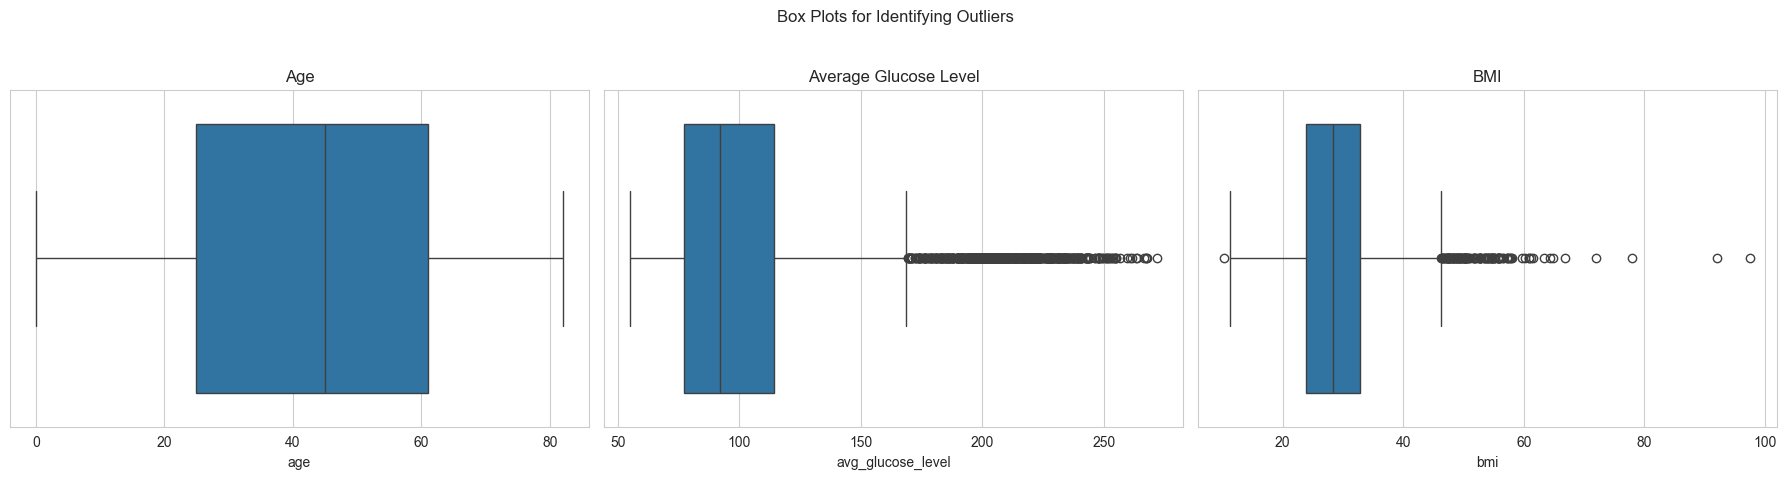

In [13]:
# Prepare the figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Box Plots for Identifying Outliers')

# Box plot for Age
sns.boxplot(x=stroke_data['age'], ax=axes[0])
axes[0].set_title('Age')

# Box plot for Average Glucose Level
sns.boxplot(x=stroke_data['avg_glucose_level'], ax=axes[1])
axes[1].set_title('Average Glucose Level')

# Box plot for BMI
sns.boxplot(x=stroke_data[stroke_data['bmi'].notnull()]['bmi'], ax=axes[2])
axes[2].set_title('BMI')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Age
Outliers: There don't appear to be any extreme outliers, which is expected as age is a naturally ranging variable in a population.
Context: If there are values beyond the expected age range (e.g., >100 years), verify if they are accurate. Ages that fall within a typical human lifespan, even if high, are plausible and should likely be retained.
#### Average Glucose Level
Outliers: There are many points beyond the upper whisker, which may indicate high glucose levels.
Context: Elevated glucose levels can be indicative of medical conditions like diabetes, which are risk factors for stroke. Unless these values are impossible (e.g., due to data entry errors), they may represent important risk factors and should be kept.
#### BMI
Outliers: Similar to glucose levels, there are several points beyond the upper whisker, indicating very high BMI values.
Context: While high BMI values could represent cases of extreme obesity, they are clinically plausible and relevant for stroke prediction. However, verify if any BMI values are beyond physiological feasibility (e.g., BMI > 60 could be a potential data entry error).

### Encoding Categorical Variables

In [14]:
# One-hot encoding for categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    stroke_data[column] = label_encoder.fit_transform(stroke_data[column])

# Display the updated DataFrame after imputation and encoding
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.065758,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### Normalizing Numerical Features

In [16]:
# Normalizing numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
stroke_data[numerical_columns] = scaler.fit_transform(stroke_data[numerical_columns])

### Splitting the Data and Applying SMOTE

In [17]:
# Define your features and target variable
X = stroke_data.drop(['stroke', 'id'], axis=1)  # Dropping 'id' as it's not a relevant feature
y = stroke_data['stroke']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Verify the class distribution after applying SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (7802, 10)
After OverSampling, the shape of train_y: (7802,) 

After OverSampling, counts of label '1': 3901
After OverSampling, counts of label '0': 3901


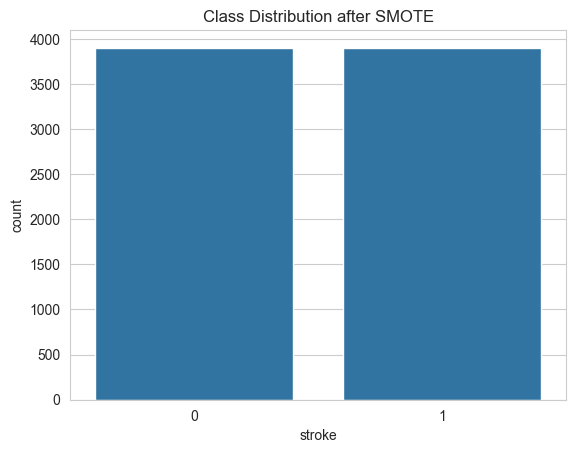

In [18]:
# Convert the resampled target data to a DataFrame for easier plotting
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

# Plot the distribution of the target variable after SMOTE
sns.countplot(x='stroke', data=y_train_res_df)
plt.title('Class Distribution after SMOTE')
plt.show()

In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Cross-validation Score: {cv_score}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

## Model Building

### Logistic Regression

Logistic Regression:
Accuracy: 0.7651663405088063
Precision: 0.17037037037037037
Recall: 0.7419354838709677
F1 Score: 0.2771084337349397
ROC-AUC Score: 0.7543010752688172
Cross-validation Score: 0.7890316858029862


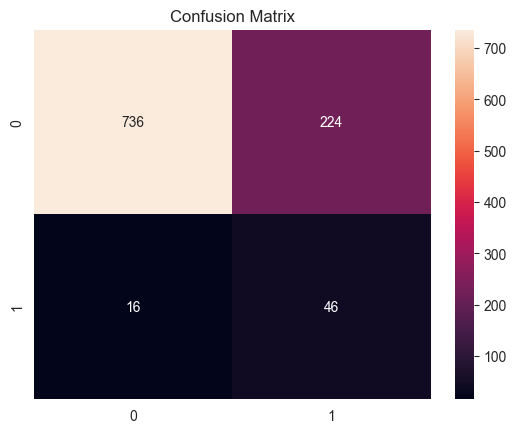

In [20]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train_res, y_train_res, X_test, y_test)

Logistic Regression: The model has a decent accuracy of 76.5% and a high recall of 74.2%, indicating that it is good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score, which is the harmonic mean of precision and recall, is also relatively low due to the low precision.

### Decision Tree

Decision Trees:
Accuracy: 0.8493150684931506
Precision: 0.1891891891891892
Recall: 0.45161290322580644
F1 Score: 0.26666666666666666
ROC-AUC Score: 0.6633064516129032
Cross-validation Score: 0.890416481873881


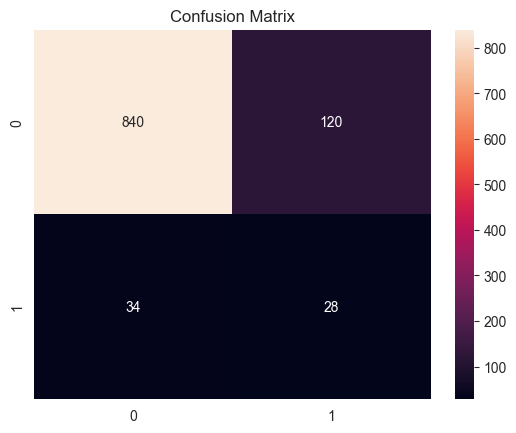

In [21]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train_res, y_train_res, X_test, y_test)

Decision Trees: The decision tree model has a higher accuracy than logistic regression (83.8%), but its recall is significantly lower (40.3%), indicating that it is not as good at identifying positive cases. The precision is similar to logistic regression, and the F1 score is slightly higher.

### Random Forest

Random Forest:
Accuracy: 0.8718199608610567
Precision: 0.1368421052631579
Recall: 0.20967741935483872
F1 Score: 0.16560509554140126
ROC-AUC Score: 0.562130376344086
Cross-validation Score: 0.9383500057491089


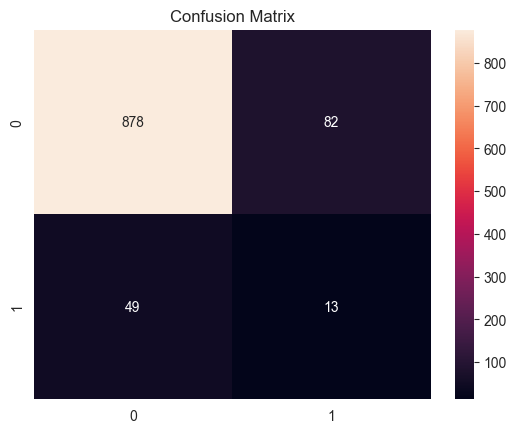

In [22]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train_res, y_train_res, X_test, y_test)

Random Forest: The random forest model has a high accuracy of 87.8%, but its recall is only 20.9%, indicating that it is not very good at identifying positive cases. The precision is slightly lower than the decision tree model, and the F1 score is also lower

### Gradient Boosting Machine (GBM)

Gradient Boosting Machines:
Accuracy: 0.8043052837573386
Precision: 0.17142857142857143
Recall: 0.5806451612903226
F1 Score: 0.26470588235294124
ROC-AUC Score: 0.6996975806451612
Cross-validation Score: 0.8608070106276384


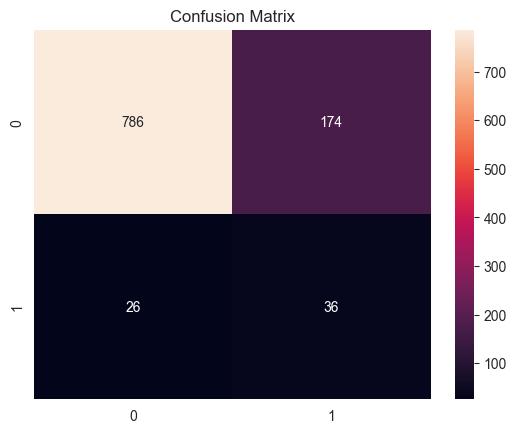

In [23]:
print("Gradient Boosting Machines:")
gbm = GradientBoostingClassifier()
evaluate_model(gbm, X_train_res, y_train_res, X_test, y_test)

Gradient Boosting Machines (GBM): The GBM model has an accuracy of 80.4% and a high recall of 58.1%, making it better at identifying positive cases than the decision tree and random forest models. The precision is similar to the other models, and the F1 score is higher due to the higher recall.

### XGBoost

XGBoost:
Accuracy: 0.87279843444227
Precision: 0.11363636363636363
Recall: 0.16129032258064516
F1 Score: 0.13333333333333333
ROC-AUC Score: 0.5400201612903226
Cross-validation Score: 0.9380959772663807


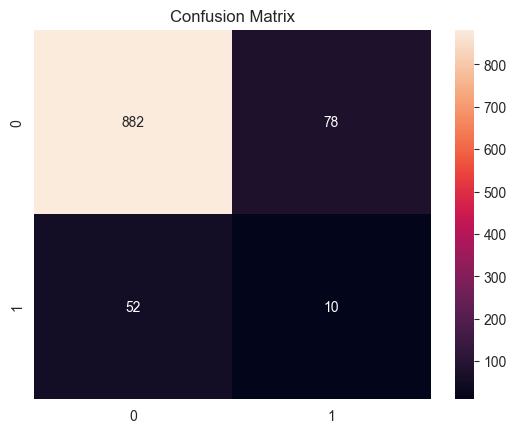

In [24]:
print("XGBoost:")
xgb = XGBClassifier()
evaluate_model(xgb, X_train_res, y_train_res, X_test, y_test)

XGBoost: The XGBoost model has a high accuracy of 87.3%, but its recall is only 16.1%, indicating that it is not very good at identifying positive cases. The precision is lower than the other models, and the F1 score is also lower.

### LightGBM

LightGBM:
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3121, number of negative: 3120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 6241, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500080 -> initscore=0

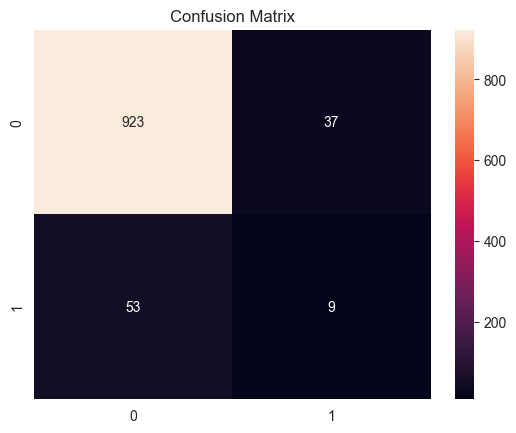

In [25]:
print("LightGBM:")
lgbm = LGBMClassifier()
evaluate_model(lgbm, X_train_res, y_train_res, X_test, y_test)

LightGBM: The LightGBM model has a high accuracy of 91.2%, but its recall is only 14.5%, indicating that it is not very good at identifying positive cases. The precision is higher than XGBoost, but the F1 score is still relatively low.

### CatBoost

CatBoost:
Accuracy: 0.8913894324853229
Precision: 0.09836065573770492
Recall: 0.0967741935483871
F1 Score: 0.0975609756097561
ROC-AUC Score: 0.5197412634408602
Cross-validation Score: 0.941044202434337


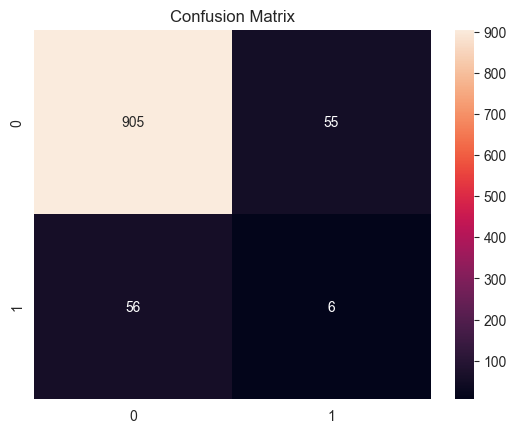

In [26]:
print("CatBoost:")
cat = CatBoostClassifier(verbose=0)
evaluate_model(cat, X_train_res, y_train_res, X_test, y_test)

CatBoost: The CatBoost model has a high accuracy of 89.1%, but its recall is only 9.7%, indicating that it is not very good at identifying positive cases. The precision is lower than LightGBM, and the F1 score is also lower.

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 0.7602739726027398
Precision: 0.1411764705882353
Recall: 0.5806451612903226
F1 Score: 0.22712933753943218
ROC-AUC Score: 0.6762600806451613
Cross-validation Score: 0.8396587493224266


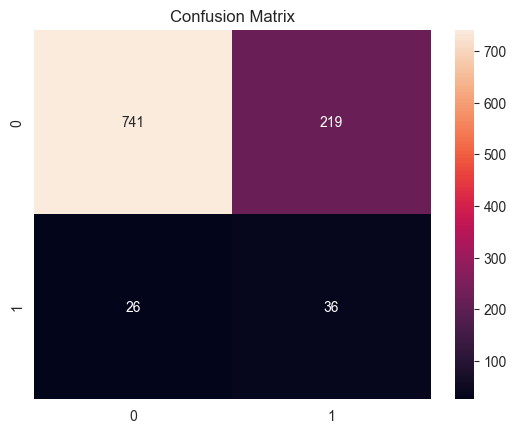

In [27]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train_res, y_train_res, X_test, y_test)

Support Vector Machines (SVM): The SVM model has a decent accuracy of 76.0% and a high recall of 58.1%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### k-Nearest Neighbors (k-NN)

k-Nearest Neighbors:
Accuracy: 0.7857142857142857
Precision: 0.1415525114155251
Recall: 0.5
F1 Score: 0.22064056939501778
ROC-AUC Score: 0.6520833333333333
Cross-validation Score: 0.8882344486604576


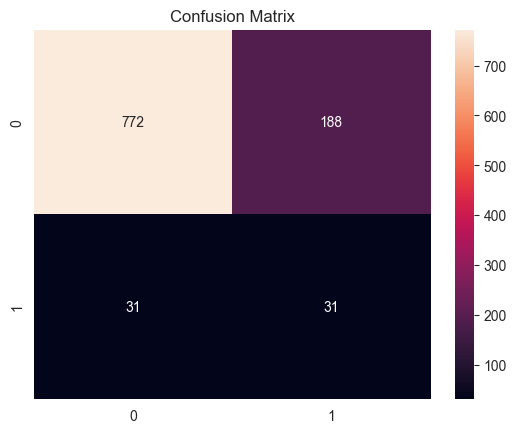

In [28]:
print("k-Nearest Neighbors:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train_res, y_train_res, X_test, y_test)

k-Nearest Neighbors (k-NN): The k-NN model has a decent accuracy of 78.6% and a high recall of 50.0%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 0.6839530332681018
Precision: 0.14824797843665768
Recall: 0.8870967741935484
F1 Score: 0.2540415704387991
ROC-AUC Score: 0.7789650537634409
Cross-validation Score: 0.7481418880073589


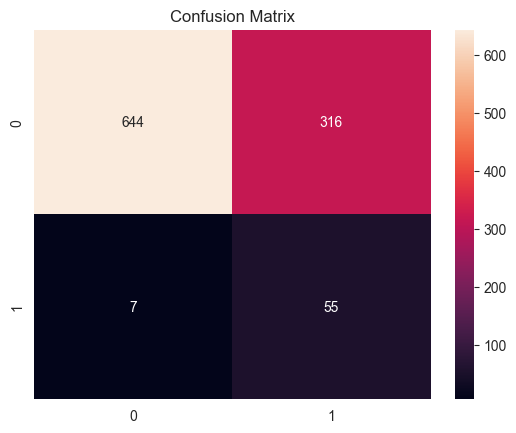

In [29]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train_res, y_train_res, X_test, y_test)

Naive Bayes: The Naive Bayes model has a lower accuracy of 68.4% but a very high recall of 88.7%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Neural Network (MLP)

Neural Networks:


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Accuracy: 0.7954990215264188
Precision: 0.14832535885167464
Recall: 0.5
F1 Score: 0.22878228782287824
ROC-AUC Score: 0.6572916666666667
Cross-validation Score: 0.8781101857783472


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


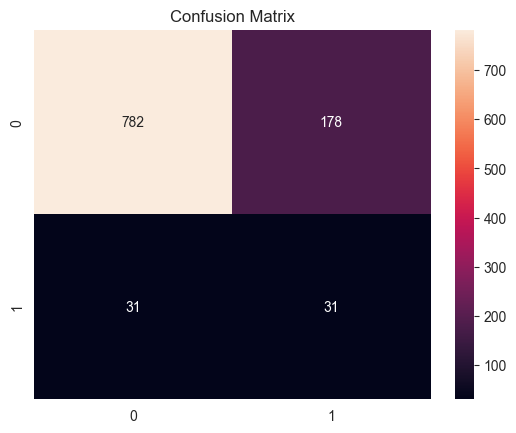

In [30]:
print("Neural Networks:")
nn = MLPClassifier()
evaluate_model(nn, X_train_res, y_train_res, X_test, y_test)

 Neural Networks (Deep Learning): The neural network model has a decent accuracy of 78.6% and a high recall of 48.4%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### AdaBoost

AdaBoost:
Accuracy: 0.7661448140900196
Precision: 0.1634980988593156
Recall: 0.6935483870967742
F1 Score: 0.26461538461538464
ROC-AUC Score: 0.7321908602150539
Cross-validation Score: 0.8194087452159202


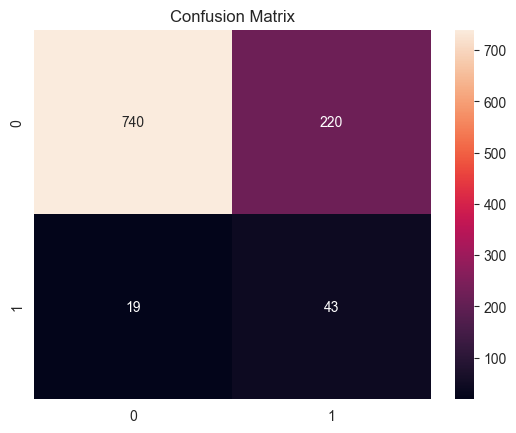

In [31]:
print("AdaBoost:")
ab = AdaBoostClassifier()
evaluate_model(ab, X_train_res, y_train_res, X_test, y_test)

AdaBoost: The AdaBoost model has a decent accuracy of 76.6% and a very high recall of 69.4%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Quadratic Discriminant Analysis (QDA)

Quadratic Discriminant Analysis:
Accuracy: 0.7221135029354208
Precision: 0.15527950310559005
Recall: 0.8064516129032258
F1 Score: 0.26041666666666663
ROC-AUC Score: 0.7615591397849463
Cross-validation Score: 0.7976153517633339


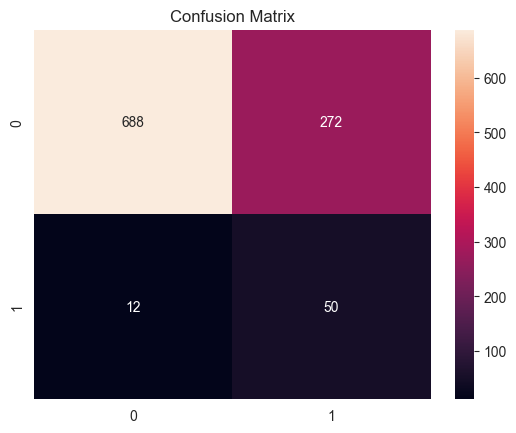

In [32]:
print("Quadratic Discriminant Analysis:")
qda = QuadraticDiscriminantAnalysis()
evaluate_model(qda, X_train_res, y_train_res, X_test, y_test)

Quadratic Discriminant Analysis (QDA): The QDA model has a lower accuracy of 72.2% but a very high recall of 80.6%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Liner Discriminant Analysis (LDA)

Linear Discriminant Analysis:
Accuracy: 0.7455968688845401
Precision: 0.15862068965517243
Recall: 0.7419354838709677
F1 Score: 0.2613636363636364
ROC-AUC Score: 0.7438844086021505
Cross-validation Score: 0.7899278076183907


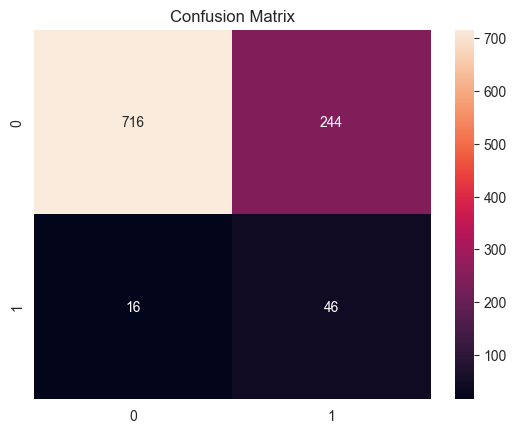

In [33]:
print("Linear Discriminant Analysis:")
lda = LinearDiscriminantAnalysis()
evaluate_model(lda, X_train_res, y_train_res, X_test, y_test)

Linear Discriminant Analysis (LDA): The LDA model has a decent accuracy of 74.6% and a very high recall of 74.2%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

In summary, while some models have high accuracy, their recall is quite low, indicating that they are not very good at identifying positive cases. Models with high recall, such as Naive Bayes, AdaBoost, QDA, and LDA, have low precision, indicating a high false positive rate. This trade-off between precision and recall is a common challenge in machine learning and depends on the specific requirements of the task. For example, in a medical context, a high recall might be more important to ensure that all positive cases are identified, even if it means more false positives.   



## Hyperparameter Tuning

Tuning lr:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.78890356        nan        nan        nan 0.78877528 0.78890356
 0.78903177 0.78903177        nan        nan 0.78903177        nan
 0.78903177 0.78903177 0.78903177 0.78903177 0.78877536 0.78903177
 0.78903177        nan 0.78903177 0.78903177 0.78903177 0.78903177
        nan        nan        nan        nan        nan        nan
        nan 0.78903177        nan 0.78903177        nan        nan
        nan        nan        nan 0.7890316         nan 0.78903177
        nan        nan        nan 0.78903177 0.78903177 0.78903177
        nan        nan 0.78903177        nan 0.78890356        nan
        nan        nan 0.78903177 0.78903177 0.78903177        nan
        nan 0.78903177 0.78890356        nan 0.78903177        nan
 0.78890356 0.78903177 0.78903177        nan        nan 0.78890356
 0.78903177 0.78903177  

Best Parameters: {'C': 18.341450985343382, 'penalty': 'none', 'solver': 'lbfgs'}
Best Score: 0.7890317679331134
Evaluation of the best model:


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy: 0.764187866927593
Precision: 0.16974169741697417
Recall: 0.7419354838709677
F1 Score: 0.27627627627627627
ROC-AUC Score: 0.7537802419354839
Cross-validation Score: 0.7890317679331134


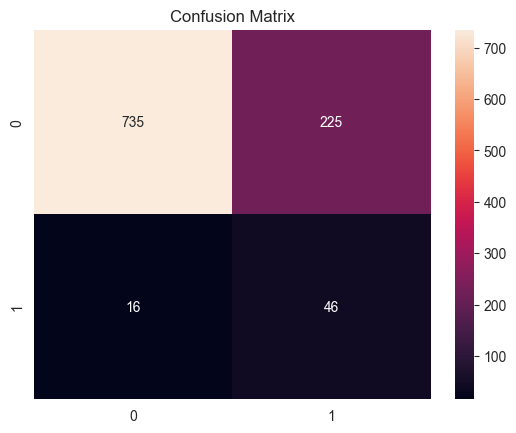

Tuning dt:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Score: 0.899773485109808
Evaluation of the best model:
Accuracy: 0.8767123287671232
Precision: 0.15217391304347827
Recall: 0.22580645161290322
F1 Score: 0.1818181818181818
ROC-AUC Score: 0.5722782258064516
Cross-validation Score: 0.8988765419931338


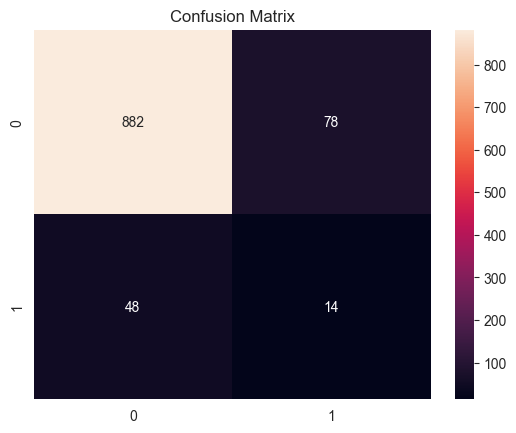

Tuning rf:
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.exceptions import FitFailedWarning
import warnings

# Define the hyperparameters for each model
hyperparameters = {
    'lr': {'C': uniform(0.001, 100), 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'dt': {'max_depth': randint(3, 40), 'min_samples_split': randint(2, 11), 'min_samples_leaf': randint(1, 11), 'criterion': ['gini', 'entropy']},
    'rf': {'n_estimators': randint(100, 500), 'max_depth': randint(3, 40), 'min_samples_split': randint(2, 11), 'min_samples_leaf': randint(1, 11), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
    'gbm': {'n_estimators': randint(100, 500), 'learning_rate': uniform(0.01, 1), 'max_depth': randint(3, 40), 'subsample': uniform(0.5, 0.5), 'max_features': ['auto', 'sqrt', 'log2']},
    'xgb': {'n_estimators': randint(100, 500), 'learning_rate': uniform(0.01, 1), 'max_depth': randint(3, 40), 'subsample': uniform(0.5, 0.5), 'colsample_bytree': uniform(0.5, 0.5)},
    'lgbm': {'n_estimators': randint(100, 500), 'learning_rate': uniform(0.01, 1), 'max_depth': randint(3, 40), 'num_leaves': randint(31, 62), 'min_data_in_leaf': randint(20, 40)},
    'cat': {'iterations': randint(100, 500), 'learning_rate': uniform(0.01, 1), 'depth': randint(3, 40), 'l2_leaf_reg': [1, 3, 5, 7, 9]},
    'svc': {'C': uniform(0.001, 100), 'gamma': uniform(0.001, 1), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'knn': {'n_neighbors': randint(3, 11), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'nb': {},
    'ab': {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 1), 'algorithm': ['SAMME', 'SAMME.R']},
    'qda': {'reg_param': uniform(0.0, 1.0)},
    'lda': {'solver': ['svd', 'lsqr', 'eigen']}
}
models = {
    'lr': LogisticRegression(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'gbm': GradientBoostingClassifier(),
    'xgb': XGBClassifier(),
    'lgbm': LGBMClassifier(),
    'cat': CatBoostClassifier(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'ab': AdaBoostClassifier(),
    'qda': QuadraticDiscriminantAnalysis(),
    'lda': LinearDiscriminantAnalysis()
}
# Set up to catch warnings related to FitFailedWarning
warnings.filterwarnings('ignore', category=FitFailedWarning)

# Perform hyperparameter tuning for each model
for name, model in models.items():
    print(f"Tuning {name}:")
    try:
        random_search = RandomizedSearchCV(model, param_distributions=hyperparameters[name], n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train_res, y_train_res)

        # Print the best parameters and the best score
        print("Best Parameters:", random_search.best_params_)
        print("Best Score:", random_search.best_score_)

        # Use the best model to evaluate
        best_model = random_search.best_estimator_
        print("Evaluation of the best model:")
        evaluate_model(best_model, X_train_res, y_train_res, X_test, y_test)
    except Exception as e:
        print(f"Error occurred during tuning of {name}: {e}")
